<a href="https://colab.research.google.com/github/SuneraUdana/NLP_CW/blob/main/tripadvisor_sentimentanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns
import numpy as np


##Task 1

In [ ]:
reviews_df = pd.read_csv('master-dataset.csv')

In [ ]:
reviews_df

,Customer,text,title,hotel_Name,numberOfReviews,finalRating
0,lauradog95,I had a wonderful stay at Colombo Court Hotel ...,"Fantastic, comfortable experience",Colombo Court Hotel & Spa,1340,5
1,Rach-Marg,The staff were incredibly welcoming and attent...,Great stay! Gorgeous authentic Sri Lankan Expe...,Colombo Court Hotel & Spa,1340,5
2,HED249,"Always a peace heaven when in Colombo 3, perfe...",Boutique hotel of all,Colombo Court Hotel & Spa,1340,5
3,tomasa317,The room was spacious. The service personnel w...,A boutique hotel like home,Colombo Court Hotel & Spa,1340,4
4,Culture41710159424,Good hotel and nice room. Good value for money...,Excellent location and friendly staff,Colombo Court Hotel & Spa,1340,5
...,...,...,...,...,...,...
9944,U5407KOdd,"Located in the City of Kandy, this is one hote...",Amaara Sky Hotel,Amaara Sky Hotel,489,5
9945,melanien462,We had a very comfortable and enjoyable stay a...,Enjoyable and comfortable experience,Amaara Sky Hotel,489,5
9946,obhashap,We stayed at Amaara Sky Kandy for 2 days. My ...,Best place to stay in KANDY,Amaara Sky Hotel,489,5
9947,charithb2023,Hotel accommodation and food were really good....,Good Times,Amaara Sky Hotel,489,5


In [ ]:
print(reviews_df.head())

             Customer                                               text  \
0          lauradog95  I had a wonderful stay at Colombo Court Hotel ...   
1           Rach-Marg  The staff were incredibly welcoming and attent...   
2              HED249  Always a peace heaven when in Colombo 3, perfe...   
3           tomasa317  The room was spacious. The service personnel w...   
4  Culture41710159424  Good hotel and nice room. Good value for money...   

                                               title  \
0                  Fantastic, comfortable experience   
1  Great stay! Gorgeous authentic Sri Lankan Expe...   
2                              Boutique hotel of all   
3                         A boutique hotel like home   
4              Excellent location and friendly staff   

                  hotel_Name  numberOfReviews  finalRating  
0  Colombo Court Hotel & Spa             1340            5  
1  Colombo Court Hotel & Spa             1340            5  
2  Colombo Court Hotel 

In [ ]:
print(reviews_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9949 entries, 0 to 9948
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer         9901 non-null   object
 1   text             9949 non-null   object
 2   title            9948 non-null   object
 3   hotel_Name       9949 non-null   object
 4   numberOfReviews  9949 non-null   int64 
 5   finalRating      9949 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 466.5+ KB
None


In [ ]:
print(reviews_df.describe())

       numberOfReviews  finalRating
count      9949.000000  9949.000000
mean       1060.352900     4.660368
std        1038.479149     0.818180
min          61.000000     1.000000
25%         346.000000     5.000000
50%         675.000000     5.000000
75%        1340.000000     5.000000
max        4991.000000     5.000000


Handling Missing Data

In [ ]:
reviews_df.dropna(inplace=True)

In [ ]:
reviews_df

,Customer,text,title,hotel_Name,numberOfReviews,finalRating
0,lauradog95,I had a wonderful stay at Colombo Court Hotel ...,"Fantastic, comfortable experience",Colombo Court Hotel & Spa,1340,5
1,Rach-Marg,The staff were incredibly welcoming and attent...,Great stay! Gorgeous authentic Sri Lankan Expe...,Colombo Court Hotel & Spa,1340,5
2,HED249,"Always a peace heaven when in Colombo 3, perfe...",Boutique hotel of all,Colombo Court Hotel & Spa,1340,5
3,tomasa317,The room was spacious. The service personnel w...,A boutique hotel like home,Colombo Court Hotel & Spa,1340,4
4,Culture41710159424,Good hotel and nice room. Good value for money...,Excellent location and friendly staff,Colombo Court Hotel & Spa,1340,5
...,...,...,...,...,...,...
9944,U5407KOdd,"Located in the City of Kandy, this is one hote...",Amaara Sky Hotel,Amaara Sky Hotel,489,5
9945,melanien462,We had a very comfortable and enjoyable stay a...,Enjoyable and comfortable experience,Amaara Sky Hotel,489,5
9946,obhashap,We stayed at Amaara Sky Kandy for 2 days. My ...,Best place to stay in KANDY,Amaara Sky Hotel,489,5
9947,charithb2023,Hotel accommodation and food were really good....,Good Times,Amaara Sky Hotel,489,5


Remove duplicates

In [ ]:
reviews_df.drop_duplicates(inplace=True)

Number of Hotels and Reviews

In [ ]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=1e7c00c138fb9ec59db7e189b1372323fc48b5ee45d61b936a094681e2dde3b3
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 8.3 MB/s eta 0:00:00


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from langdetect import detect
import emoji
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#get English stop words
stop_words = set(stopwords.words('english'))

#function to detect if a text is in english
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

#fucntion to remove emojis from text
def remove_emojis(text):
    return emoji.demojize(text)

#function to clean the review
def clean_review(text):
  if is_english(text):
    text = remove_emojis(text)
    #convert to lowercase
    text = text.lower()
    text = re.sub(r'http\S+', '', text) #urls

    #remove special characters
    text = re.sub(r'[^a-zA-z0-9\s]','',text)
    text = re.sub(r'\s+',' ',text).strip() #remove spaces

    #remove stop words
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)
    return text if text else None
  else:
    return None

reviews_df['cleaned_text'] = reviews_df['text'].apply(clean_review)

In [ ]:
reviews_df.head(
)

,Customer,text,title,hotel_Name,numberOfReviews,finalRating,cleaned_text
0,lauradog95,I had a wonderful stay at Colombo Court Hotel ...,"Fantastic, comfortable experience",Colombo Court Hotel & Spa,1340,5,wonderful stay colombo court hotel spa whilst ...
1,Rach-Marg,The staff were incredibly welcoming and attent...,Great stay! Gorgeous authentic Sri Lankan Expe...,Colombo Court Hotel & Spa,1340,5,staff incredibly welcoming attentive mohammed ...
2,HED249,"Always a peace heaven when in Colombo 3, perfe...",Boutique hotel of all,Colombo Court Hotel & Spa,1340,5,always peace heaven colombo 3 perfectly situat...
3,tomasa317,The room was spacious. The service personnel w...,A boutique hotel like home,Colombo Court Hotel & Spa,1340,4,room spacious service personnel warm gracious ...
4,Culture41710159424,Good hotel and nice room. Good value for money...,Excellent location and friendly staff,Colombo Court Hotel & Spa,1340,5,good hotel nice room good value money location...


In [ ]:
#Save to a new CSV file
reviews_df.to_csv('cleaned_reviews.csv', index=False)
print("Cleaned data saved to cleaned_reviews.csv")

Cleaned data saved to cleaned_reviews.csv


In [ ]:
reviews_df.head()

,Customer,text,title,hotel_Name,numberOfReviews,finalRating,cleaned_text
0,lauradog95,I had a wonderful stay at Colombo Court Hotel ...,"Fantastic, comfortable experience",Colombo Court Hotel & Spa,1340,5,wonderful stay colombo court hotel spa whilst ...
1,Rach-Marg,The staff were incredibly welcoming and attent...,Great stay! Gorgeous authentic Sri Lankan Expe...,Colombo Court Hotel & Spa,1340,5,staff incredibly welcoming attentive mohammed ...
2,HED249,"Always a peace heaven when in Colombo 3, perfe...",Boutique hotel of all,Colombo Court Hotel & Spa,1340,5,always peace heaven colombo 3 perfectly situat...
3,tomasa317,The room was spacious. The service personnel w...,A boutique hotel like home,Colombo Court Hotel & Spa,1340,4,room spacious service personnel warm gracious ...
4,Culture41710159424,Good hotel and nice room. Good value for money...,Excellent location and friendly staff,Colombo Court Hotel & Spa,1340,5,good hotel nice room good value money location...


In [ ]:
num_hotels = reviews_df['hotel_Name'].nunique()
# Number of reviews for each hotel
reviews_per_hotel = reviews_df['hotel_Name'].value_counts()
print("Number of hotels:", num_hotels)
print("Number of reviews for each hotel:\n", reviews_per_hotel)

Number of hotels: 140
Number of reviews for each hotel:
 hotel_Name
Colombo Court Hotel & Spa                  100
Sundaras Resort & Spa                      100
Uga Ulagalla                               100
Skyloft Kandy By Aaradhya                  100
Turyaa Kalutara by Aitken Spence Hotels    100
                                          ... 
Mahaweli Reach Hotel                        20
Clove Villa                                 20
Royal Palms Beach Hotel                     20
Palm Villa Mirissa                          20
Amaara Sky Hotel                            20
Name: count, Length: 140, dtype: int64


##- Data Histograms Task

<ipython-input-28-c87f08392ef2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df['article_len'] = reviews_df['cleaned_text'].apply(lambda x: len(x.split()))


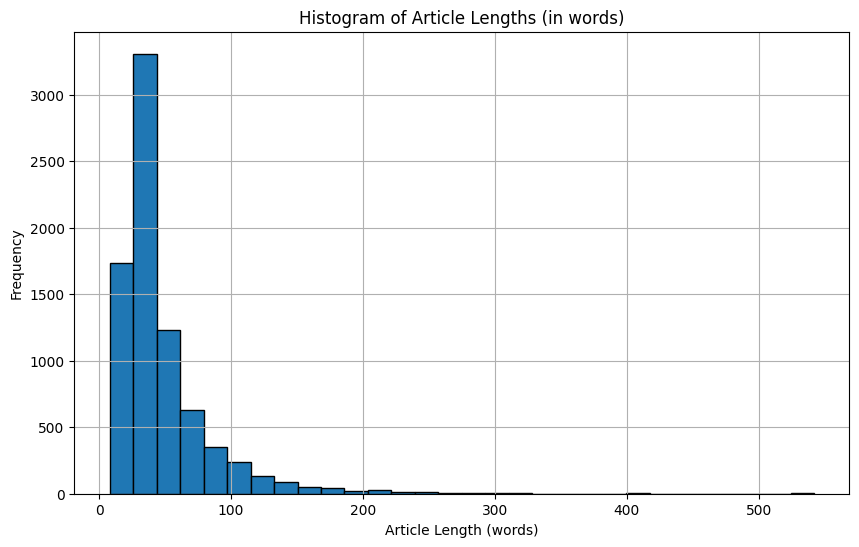

In [ ]:
# Calculate the length of each article in words
reviews_df = reviews_df.dropna(subset=['cleaned_text'])
reviews_df['article_len'] = reviews_df['cleaned_text'].apply(lambda x: len(x.split()))

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(reviews_df['article_len'], bins=30, edgecolor='black')
plt.title('Histogram of Article Lengths (in words)')
plt.xlabel('Article Length (words)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [40]:
# Total and unique words in the dataset
all_words = [word for review in reviews_df['cleaned_text'] for word in review.split()]
unique_words = set(all_words)
print(f"\nTotal words: {len(all_words)}")
print(f"Unique words: {len(unique_words)}")


Total words: 381184
Unique words: 20608


In [41]:
# Calculate Lexical Diversity
lexical_diversity = len(unique_words) / len(all_words)
print(f"Lexical Diversity: {lexical_diversity:.4f}")

Lexical Diversity: 0.0541


<ipython-input-43-01e471782656>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='finalRating', data=reviews_df, palette='viridis')


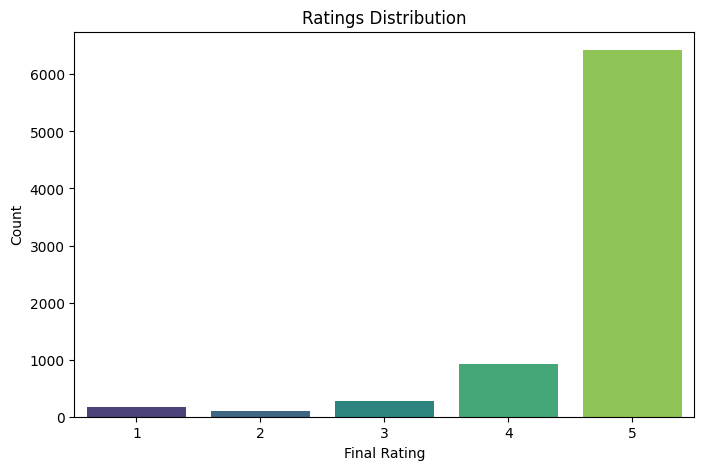

In [43]:
#Ratings Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='finalRating', data=reviews_df, palette='viridis')
plt.title('Ratings Distribution')
plt.xlabel('Final Rating')
plt.ylabel('Count')
plt.show()

## Task 2	-Sentiment Classifications ~ 3 sentiment classifiers at least one sentiment lexicon
		+ VADER (Valence Aware Dictionary and sEntiment Reasoner) -sentiment lexicon
		+ TextBlob
		+ SentiWordNet
		+ Bing Liu Lexicon
	- Apply a Majority Vote Scheme


installing required Libraries

In [ ]:
#!pip install textblob
#!pip install vaderSentiment
#!pip install transformers

In [ ]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [62]:
reviews_df = pd.read_csv('cleaned_reviews.csv')
print(reviews_df.head())

             Customer                                               text  \
0          lauradog95  I had a wonderful stay at Colombo Court Hotel ...   
1           Rach-Marg  The staff were incredibly welcoming and attent...   
2              HED249  Always a peace heaven when in Colombo 3, perfe...   
3           tomasa317  The room was spacious. The service personnel w...   
4  Culture41710159424  Good hotel and nice room. Good value for money...   

                                               title  \
0                  Fantastic, comfortable experience   
1  Great stay! Gorgeous authentic Sri Lankan Expe...   
2                              Boutique hotel of all   
3                         A boutique hotel like home   
4              Excellent location and friendly staff   

                  hotel_Name  numberOfReviews  finalRating  \
0  Colombo Court Hotel & Spa             1340            5   
1  Colombo Court Hotel & Spa             1340            5   
2  Colombo Court Hot

In [77]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet
import nltk
from textblob import TextBlob

# Download necessary NLTK data
nltk.download('sentiwordnet')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [65]:
# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

def classify_vader(text):
    """Classify sentiment using VADER."""
    score = sia.polarity_scores(text)
    if score['compound'] > 0.05:
        return 'positive'
    elif score['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Load Bing Liu Lexicon
positive_words = set(open('positive-words.txt',encoding='ISO-8859-1').read().splitlines())
negative_words = set(open('negative-words.txt',encoding='ISO-8859-1').read().splitlines())

def classify_bing_liu(text):
    """Classify sentiment using Bing Liu's Lexicon."""
    tokens = nltk.word_tokenize(text)
    pos_count = sum(1 for word in tokens if word in positive_words)
    neg_count = sum(1 for word in tokens if word in negative_words)

    if pos_count > neg_count:
        return 'positive'
    elif neg_count > pos_count:
        return 'negative'
    else:
        return 'neutral'

def classify_textblob(text):
    """Classify sentiment using TextBlob."""
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [74]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [79]:
# Handle any NaN or non-string values in 'cleaned_text' column
reviews_df['cleaned_text'] = reviews_df['cleaned_text'].astype(str)

#apply classifiers to the dataset
reviews_df['vader_sentiment'] = reviews_df['cleaned_text'].apply(classify_vader)
reviews_df['bing_liu_sentiment'] = reviews_df['cleaned_text'].apply(classify_bing_liu)
reviews_df['textblob_sentiment'] = reviews_df['cleaned_text'].apply(classify_textblob)

# Preview classifier results
print(reviews_df[['cleaned_text', 'vader_sentiment', 'bing_liu_sentiment', 'textblob_sentiment']].head())

                                        cleaned_text vader_sentiment  \
0  wonderful stay colombo court hotel spa whilst ...        positive   
1  staff incredibly welcoming attentive mohammed ...        positive   
2  always peace heaven colombo 3 perfectly situat...        positive   
3  room spacious service personnel warm gracious ...        positive   
4  good hotel nice room good value money location...        positive   

  bing_liu_sentiment textblob_sentiment  
0           positive           positive  
1           positive           positive  
2           positive           positive  
3           positive           positive  
4           positive           positive  


In [83]:
# Majority Vote Sentiment
def majority_vote(votes):
    """Return the sentiment with the most votes."""
    return Counter(votes).most_common(1)[0][0]

# Determine the ground truth sentiment via majority voting
reviews_df['ground_truth_sentiment'] = reviews_df.apply(
    lambda row: majority_vote([row['vader_sentiment'], row['bing_liu_sentiment'], row['textblob_sentiment']]),
    axis=1
)

# Preview ground truth results
print(reviews_df[['cleaned_text', 'vader_sentiment', 'bing_liu_sentiment', 'textblob_sentiment', 'ground_truth_sentiment']].head())

                                        cleaned_text vader_sentiment  \
0  wonderful stay colombo court hotel spa whilst ...        positive   
1  staff incredibly welcoming attentive mohammed ...        positive   
2  always peace heaven colombo 3 perfectly situat...        positive   
3  room spacious service personnel warm gracious ...        positive   
4  good hotel nice room good value money location...        positive   

  bing_liu_sentiment textblob_sentiment ground_truth_sentiment  
0           positive           positive               positive  
1           positive           positive               positive  
2           positive           positive               positive  
3           positive           positive               positive  
4           positive           positive               positive  


<ipython-input-86-3523c8aeb017>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ground_truth_sentiment', data=reviews_df, palette='viridis')


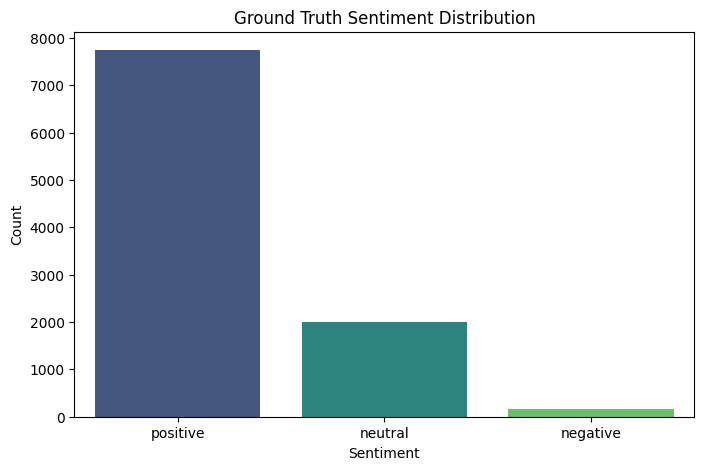

In [86]:
# Plot the distribution of ground truth sentiments
plt.figure(figsize=(8, 5))
sns.countplot(x='ground_truth_sentiment', data=reviews_df, palette='viridis')
plt.title('Ground Truth Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [91]:
# Calculate majority vote sentiment
reviews_df['majority_sentiment'] = reviews_df[['textblob_sentiment', 'vader_sentiment', 'bing_liu_sentiment']].apply(lambda x: majority_vote(x), axis=1)

In [93]:
# Select a sample of reviews
sample_reviews = reviews_df.sample(n=10,random_state = 3)

# Adjust the sample size as needed # Print the sample reviews along with their sentiment scores for qualitative analysis f
for index, row in sample_reviews.iterrows():
  print(f"Review: {row['cleaned_text']}")
  print(f"textblob Sentiment: {row['textblob_sentiment']}")
  print(f"VADER Sentiment: {row['vader_sentiment']}")
  print(f"Bing Liu Lexicon Sentiment: {row['bing_liu_sentiment']}")
  print(f"Majority Sentiment: {row['majority_sentiment']}")
  print("\n")

Review: nan
textblob Sentiment: neutral
VADER Sentiment: neutral
Bing Liu Lexicon Sentiment: neutral
Majority Sentiment: neutral


Review: fort bliss perfect place stay visit galle located within fort charmingly decorated accordingly well adjusted feel like staying museum little nice oasis room faced sunset sea right outside window really lovely staff polite helpful get back galle definitely staying
textblob Sentiment: positive
VADER Sentiment: positive
Bing Liu Lexicon Sentiment: positive
Majority Sentiment: positive


Review: regeta arie lagoon srilanka food nice breakfast buffet food delicious rooms spacious staff attentive went way ensure comfortable
textblob Sentiment: positive
VADER Sentiment: positive
Bing Liu Lexicon Sentiment: positive
Majority Sentiment: positive


Review: actually went 2019 fantastic place accommodating owner team made stay truly amazing stayed properties enjoying yala park encounters leopard elephants totally magical food accommodation spot families needs
t

## Task 3	-Justify the selection
	- 2 sparse vectors (Bag of Words, TF-IDF Term Frequency-Inverse Document Frequency, N-grams)
	- 2 dense vectors (Word2Vec,GLoVEe, FastText)


Sparse Vector Representation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Load the cleaned dataset
reviews_df = pd.read_csv('cleaned_reviews.csv')
reviews_df = reviews_df.dropna(subset=['cleaned_text'])
# Extract the cleaned text column
X = reviews_df['cleaned_text']

# Create BoW representation
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(X)

# Shape of the data matrix
print("Shape of BoW matrix:", X_bow.shape)

Shape of BoW matrix: (7920, 20718)


TF_IDF(Term frequency-Inverse Document Frequency)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#TF-IDF representation
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(X)

# Shape of the matrix
print("Shape of TF-IDF matrix:", X_tfidf.shape)

Shape of TF-IDF matrix: (7920, 20718)


### 2 dense vectors (Word2Vec,GLoVEe, FastText)

In [ ]:
from gensim.models import Word2Vec
import numpy as np

# Tokenize the reviews
tokenized_reviews = [review.split() for review in X]
# Train Word2Vec model
model_word2vec = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, sg=0)

#dense vector representation by averaging word vectors
def get_avg_word2vec(review, model):
  words = review.split()
  word_vecs = [model.wv[word] for word in words if word in model.wv]
  return np.mean(word_vecs, axis=0)

X_word2vec = np.array([get_avg_word2vec(review, model_word2vec) for review in X])

# Shape of the data matrix
print("Shape of Word2Vec matrix:",X_word2vec.shape)

Shape of Word2Vec matrix: (7920, 100)


###GloVe (Global Vectors for Word Representation)

In [ ]:
import gensim.downloader as api
#Using pretrained GloVe vectors

glmodel = api.load("glove-wiki-gigaword-100")

# Generate dense vector representation by averaging GloVe vectors
def get_avg_glove(review, model):
  words = review.split()
  word_vecs = [model[word] for word in words if word in model]
  return np.mean(word_vecs, axis=0)

X_glove = np.array([get_avg_glove(review, glmodel) for review in X])

# Shape of the data matrix
print("Shape of GloVe matrix:",X_glove.shape)

Shape of GloVe matrix: (7920, 100)


In [ ]:
from gensim.models import FastText
import numpy as np

# Tokenize the reviews
tokenized_reviews = [review.split() for review in X]

# Train FastText model
model_fasttext = FastText(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, sg=1)

# Generate dense vector representation by averaging word vectors
def get_avg_fasttext(review, model):
  words = review.split()
  word_vecs = [model.wv[word] for word in words if word in model.wv]
  return np.mean(word_vecs, axis=0)

X_fasttext = np.array([get_avg_fasttext(review, model_fasttext) for review in X])

# Shape of the data matrix
print("Shape of FastText matrix:",X_fasttext.shape)

Shape of FastText matrix: (7920, 100)


Task 4	-  use each extraction method and see performance- 4 methods in task 3
	- logistic regression
	- SVM (Support Vector Machines)
	- Random Forest Classifiers


In [37]:
reviews_df.head()

,Customer,text,title,hotel_Name,numberOfReviews,finalRating,cleaned_text
0,lauradog95,I had a wonderful stay at Colombo Court Hotel ...,"Fantastic, comfortable experience",Colombo Court Hotel & Spa,1340,5,wonderful stay colombo court hotel spa whilst ...
1,Rach-Marg,The staff were incredibly welcoming and attent...,Great stay! Gorgeous authentic Sri Lankan Expe...,Colombo Court Hotel & Spa,1340,5,staff incredibly welcoming attentive mohammed ...
2,HED249,"Always a peace heaven when in Colombo 3, perfe...",Boutique hotel of all,Colombo Court Hotel & Spa,1340,5,always peace heaven colombo 3 perfectly situat...
3,tomasa317,The room was spacious. The service personnel w...,A boutique hotel like home,Colombo Court Hotel & Spa,1340,4,room spacious service personnel warm gracious ...
4,Culture41710159424,Good hotel and nice room. Good value for money...,Excellent location and friendly staff,Colombo Court Hotel & Spa,1340,5,good hotel nice room good value money location...


In [97]:
from sklearn.model_selection import train_test_split

X = reviews_df['cleaned_text']
y = reviews_df['majority_sentiment']

# Assuming 'majority_sentiment' is the sentiment labels column # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec, FastText
import gensim.downloader as api
import numpy as np

# BoW with N-grams
vectorizer_bow = CountVectorizer()
X_train_bow_ngram = vectorizer_bow.fit_transform(X_train)
X_test_bow_ngram = vectorizer_bow.transform(X_test)

# TF-IDF with N-grams
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf_ngram = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf_ngram = vectorizer_tfidf.transform(X_test)

# Word2Vec
tokenized_reviews_train = [review.split() for review in X_train]
tokenized_reviews_test = [review.split() for review in X_test]
model_word2vec = Word2Vec(sentences=tokenized_reviews_train, vector_size=100, window=5, min_count=1, sg=0)
X_train_word2vec = np.array([np.mean([model_word2vec.wv[word] for word in review if word in model_word2vec.wv] or [np.zeros(100)], axis=0) for review in X_train])
X_test_word2vec = np.array([np.mean([model_word2vec.wv[word] for word in review if word in model_word2vec.wv] or [np.zeros(100)], axis=0) for review in X_test])

# GloVe
glmodel = api.load("glove-wiki-gigaword-100")
X_train_glove = np.array([np.mean([glmodel[word] for word in review.split() if word in glmodel] or [np.zeros(100)], axis=0) for review in X_train])
X_test_glove = np.array([np.mean([glmodel[word] for word in review.split() if word in glmodel] or [np.zeros(100)], axis=0) for review in X_test])

# FastText
model_fasttext = FastText(sentences=tokenized_reviews_train, vector_size=100, window=5, min_count=1, sg=1)
X_train_fasttext = np.array([np.mean([model_fasttext.wv[word] for word in review if word in model_fasttext.wv] or [np.zeros(100)], axis=0) for review in X_train])
X_test_fasttext = np.array([np.mean([model_fasttext.wv[word] for word in review if word in model_fasttext.wv] or [np.zeros(100)], axis=0) for review in X_test])


In [100]:
#Resample the Data
resample = SMOTE(random_state=42)

# Apply resampling to each feature set
X_resampled_bow_ngram, y_resampled_bow_ngram = resample.fit_resample(X_train_bow_ngram, y_train)
X_resampled_tfidf_ngram, y_resampled_tfidf_ngram = resample.fit_resample(X_train_tfidf_ngram, y_train)
X_resampled_word2vec, y_resampled_word2vec = resample.fit_resample(X_train_word2vec, y_train)
X_resampled_glove, y_resampled_glove = resample.fit_resample(X_train_glove, y_train)
X_resampled_fasttext, y_resampled_fasttext = resample.fit_resample(X_train_fasttext, y_train)


## Task 4 - use each extraction method and see performance- 4 methods in task 3 - logistic regression - SVM (Support Vector Machines) - Random Forest Classifiers

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to train and evaluate a model
def train_evaluate_model(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear'),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

# Feature sets after resampling
feature_sets_resampled = {
    'BoW with N-grams': (X_resampled_bow_ngram, X_test_bow_ngram),
    'TF-IDF with N-grams': (X_resampled_tfidf_ngram, X_test_tfidf_ngram),
    'Word2Vec': (X_resampled_word2vec, X_test_word2vec),
    'GloVe': (X_resampled_glove, X_test_glove),
    'FastText': (X_resampled_fasttext, X_test_fasttext)
}

Model: Logistic Regression, Feature: BoW with N-grams, Accuracy: 0.9828, Precision: 0.9845, Recall: 0.9828, F1 Score: 0.9836
Model: Logistic Regression, Feature: TF-IDF with N-grams, Accuracy: 0.9904, Precision: 0.9906, Recall: 0.9904, F1 Score: 0.9905
Model: Logistic Regression, Feature: Word2Vec, Accuracy: 0.7934, Precision: 0.9777, Recall: 0.7934, F1 Score: 0.8688
Model: Logistic Regression, Feature: GloVe, Accuracy: 0.9818, Precision: 0.9916, Recall: 0.9818, F1 Score: 0.9851
Model: Logistic Regression, Feature: FastText, Accuracy: 0.7146, Precision: 0.9777, Recall: 0.7146, F1 Score: 0.8134
Model: SVM, Feature: BoW with N-grams, Accuracy: 0.9823, Precision: 0.9843, Recall: 0.9823, F1 Score: 0.9832
Model: SVM, Feature: TF-IDF with N-grams, Accuracy: 0.9879, Precision: 0.9861, Recall: 0.9879, F1 Score: 0.9864
Model: SVM, Feature: Word2Vec, Accuracy: 0.8490, Precision: 0.9761, Recall: 0.8490, F1 Score: 0.9039
Model: SVM, Feature: GloVe, Accuracy: 0.9788, Precision: 0.9895, Recall: 0.97

In [102]:
# Evaluate models on resampled data
results_resampled = {}
for model_name, model in models.items():
    for feature_name, (X_train_resampled, X_test_resampled) in feature_sets_resampled.items():
        y_resampled = y_resampled_bow_ngram if 'bow' in feature_name else y_resampled_tfidf_ngram if 'tfidf' in feature_name else y_resampled_word2vec if 'word2vec' in feature_name else y_resampled_glove if 'glove' in feature_name else y_resampled_fasttext
        accuracy, precision, recall, f1 = train_evaluate_model(X_train_resampled, X_test_resampled, y_resampled, y_test, model)
        results_resampled[(model_name, feature_name)] = (accuracy, precision, recall, f1)
        print(f"Model: {model_name}, Feature: {feature_name}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

Model: Logistic Regression, Feature: BoW with N-grams, Accuracy: 0.9828, Precision: 0.9845, Recall: 0.9828, F1 Score: 0.9836
Model: Logistic Regression, Feature: TF-IDF with N-grams, Accuracy: 0.9904, Precision: 0.9906, Recall: 0.9904, F1 Score: 0.9905
Model: Logistic Regression, Feature: Word2Vec, Accuracy: 0.7934, Precision: 0.9777, Recall: 0.7934, F1 Score: 0.8688
Model: Logistic Regression, Feature: GloVe, Accuracy: 0.9818, Precision: 0.9916, Recall: 0.9818, F1 Score: 0.9851
Model: Logistic Regression, Feature: FastText, Accuracy: 0.7146, Precision: 0.9777, Recall: 0.7146, F1 Score: 0.8134
Model: SVM, Feature: BoW with N-grams, Accuracy: 0.9823, Precision: 0.9843, Recall: 0.9823, F1 Score: 0.9832
Model: SVM, Feature: TF-IDF with N-grams, Accuracy: 0.9879, Precision: 0.9861, Recall: 0.9879, F1 Score: 0.9864
Model: SVM, Feature: Word2Vec, Accuracy: 0.8490, Precision: 0.9761, Recall: 0.8490, F1 Score: 0.9039
Model: SVM, Feature: GloVe, Accuracy: 0.9788, Precision: 0.9895, Recall: 0.97